In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from numpy import *

<font face="微软雅黑" size=5 color=#A52A2A >
Parsing & Split

In [2]:
df=pd.read_csv('housing.csv')
df_train=df[0:18576]
df_test=df[18576:20640]
df_train.iloc[0:3]

,total_rooms,population,median_income,median_house_value
0,880,322,8.3252,452600
1,7099,2401,8.3014,358500
2,1467,496,7.2574,352100


<font face="微软雅黑" size=5 color=#A52A2A >
Utilities

In [3]:
############################################################M=1
def base_f1(x1,x2,x3,mode):
    if mode==0:
        return 1
    elif mode==1:
        return x1
    elif mode==2:
        return x2
    elif mode==3:
        return x3
    else:
        print("error")
        return 0
    
def predict1(x1,x2,x3,W_ML):
    ans=0;
    for i in range(4):
        ans=ans+W_ML[i]*base_f1(x1,x2,x3,i)
    return ans

def E_rms1(W_ML,reluarization):
    global  df_test
    error=0
    for i in range(2064):
        error=error+(predict1(df_test.iloc[i,0],df_test.iloc[i,1],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/2064 )**0.5

def E_rms1_2(W_ML,reluarization):
    global  df_train
    error=0
    for i in range(num_train):
        #print((predict(df_test.iloc[i,0],df_test.iloc[i,1],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3]))
        error=error+(predict1(df_train.iloc[i,0],df_train.iloc[i,1],df_train.iloc[i,2],W_ML)-df_train.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/num_train )**0.5

In [4]:
############################################################M=2
def base_f2(x1,x2,x3,mode):
    if mode==0:
        return 1
    elif mode==1:
        return x1
    elif mode==2:
        return x2
    elif mode==3:
        return x3
    elif mode==4:
        return x1**2
    elif mode==5:
        return x2**2
    elif mode==6:
        return x3**2
    elif mode==7:
        return x1*x2
    elif mode==8:
        return x1*x3
    elif mode==9:
        return x2*x3
    else:
        print("error")
        return 0

def predict2(x1,x2,x3,W_ML):
    ans=0;
    for i in range(10):
        #print("haha:",W_ML[i],base_f2(x1,x2,x3,i),W_ML[i]*base_f2(x1,x2,x3,i))
        ans=ans+W_ML[i]*base_f2(x1,x2,x3,i)
    return ans

def E_rms2(W_ML,reluarization):
    global  df_test
    error=0
    for i in range(2064):
        error=error+(predict2(df_test.iloc[i,0],df_test.iloc[i,1],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/2064 )**0.5

def E_rms2_2(W_ML,reluarization):
    global  df_train
    error=0
    for i in range(num_train):
        error=error+(predict2(df_train.iloc[i,0],df_train.iloc[i,1],df_train.iloc[i,2],W_ML)-df_train.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/num_train )**0.5

In [5]:
############################################################M=3
def base_f3(x1,x2,x3,mode):
    if mode==0:
        return 1
    elif mode==1:
        return x1
    elif mode==2:
        return x2
    elif mode==3:
        return x3
    elif mode==4:
        return x1**2
    elif mode==5:
        return x2**2
    elif mode==6:
        return x3**2
    elif mode==7:
        return x1*x2
    elif mode==8:
        return x1*x3
    elif mode==9:
        return x2*x3
    elif mode==10:
        return x1**3
    elif mode==11:
        return x2**3
    elif mode==12:
        return x3**3
    elif mode==13:
        return (x1**2)*x2
    elif mode==14:
        return (x2**2)*x3
    elif mode==15:
        return (x1**2)*x3
    elif mode==16:
        return x1*(x2**2)
    elif mode==17:
        return x2*(x3**2)
    elif mode==18:
        return x1*(x3**2)
    elif mode==19:
        return x1*x2*x3
    else:
        print("error")
        return 0

def predict3(x1,x2,x3,W_ML):
    ans=0;
    for i in range(20):
        ans=ans+W_ML[i]*base_f3(x1,x2,x3,i)
    return ans

def E_rms3(W_ML,reluarization):
    global  df_test
    error=0
    for i in range(2064):
        error=error+(predict3(df_test.iloc[i,0],df_test.iloc[i,1],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/2064 )**0.5

def E_rms3_2(W_ML,reluarization):
    global  df_train
    error=0
    for i in range(num_train):
        error=error+(predict3(df_train.iloc[i,0],df_train.iloc[i,1],df_train.iloc[i,2],W_ML)-df_train.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/num_train )**0.5

In [6]:
num_train=18576
train_t=np.ones((num_train,1));
reluarization1=0
reluarization2=0.1
reluarization3=0.001

for i in range(num_train):
    train_t[i]=df_train.iloc[i,3]   

<font face="微软雅黑" size=5 color=#A52A2A >
Compare erms with λ=0,0.1,0.001

In [7]:

design_matrix1=np.ones((num_train,4));
for i in range(num_train):
    for j in range(1,4):
        design_matrix1[i][j] = base_f1( df_train.iloc[i,0] , df_train.iloc[i,1] , df_train.iloc[i,2], j )
             
W_ML1 = np.linalg.inv( np.identity(4)*reluarization1+(design_matrix1.T).dot(design_matrix1)).dot(design_matrix1.T).dot(train_t)

W_ML2 = np.linalg.inv( np.identity(4)*reluarization2+(design_matrix1.T).dot(design_matrix1)).dot(design_matrix1.T).dot(train_t)

W_ML3 = np.linalg.inv( np.identity(4)*reluarization3+(design_matrix1.T).dot(design_matrix1)).dot(design_matrix1.T).dot(train_t)


#print(W_ML1)
#print(W_ML2)
#print(W_ML3)
#print("---------------------------------------------")
#print(  predict1(880,322,8.3252,W_ML1)  )
#print(  predict1(880,322,8.3252,W_ML2)  )
#print(  predict1(880,322,8.3252,W_ML3)  )
print("----------------M=1  train-----------------------------")
print(  "λ=0:    ",E_rms1_2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms1_2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms1_2(W_ML3,reluarization3)       )
print("----------------M=1  test-----------------------------")
print(  "λ=0:    ",E_rms1(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms1(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms1(W_ML3,reluarization3)       )

----------------M=1  train-----------------------------
λ=0:     84854.74088110811
λ=0.1:   84854.89963461156
λ=0.001: 84854.74247206222
----------------M=1  test-----------------------------
λ=0:     71105.78029246286
λ=0.1:   71107.21881075086
λ=0.001: 71105.79467947742


In [8]:
design_matrix2=np.ones((num_train,10));
for i in range(num_train):
    for j in range(1,10):
        design_matrix2[i][j] = base_f2( df_train.iloc[i,0] , df_train.iloc[i,1] , df_train.iloc[i,2], j )
#print(design_matrix2)              
    
W_ML1 = np.linalg.inv( np.identity(10)*reluarization1+(design_matrix2.T).dot(design_matrix2)).dot(design_matrix2.T).dot(train_t)

W_ML2 = np.linalg.inv( np.identity(10)*reluarization2+(design_matrix2.T).dot(design_matrix2)).dot(design_matrix2.T).dot(train_t)

W_ML3 = np.linalg.inv( np.identity(10)*reluarization3+(design_matrix2.T).dot(design_matrix2)).dot(design_matrix2.T).dot(train_t)

#print(W_ML1)
#print(W_ML2)
#print(W_ML3)
#print("---------------------------------------------")
#print(  predict2(880,322,8.3252,W_ML1)  )
#print(  predict2(880,322,8.3252,W_ML2)  )
#print(  predict2(880,322,8.3252,W_ML3)  )
print("------------------M=2  train------------------------")
print(  "λ=0:    ",E_rms2_2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms2_2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms2_2(W_ML3,reluarization3)       )
print("------------------M=2  test------------------------")
print(  "λ=0:    ",E_rms2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms2(W_ML3,reluarization3)       )


------------------M=2  train------------------------
λ=0:     83289.69128889841
λ=0.1:   83289.81694060806
λ=0.001: 83289.69254355547
------------------M=2  test------------------------
λ=0:     72133.95111180311
λ=0.1:   72135.15851510968
λ=0.001: 72133.96318656005


In [9]:
design_matrix3=np.ones((num_train,20));
for i in range(num_train):
    for j in range(1,20):
        design_matrix3[i][j] = base_f3( df_train.iloc[i,0] , df_train.iloc[i,1] , df_train.iloc[i,2], j )
#print(design_matrix3)              
    
W_ML1 = np.linalg.inv( np.identity(20)*reluarization1+(design_matrix3.T).dot(design_matrix3)).dot(design_matrix3.T).dot(train_t)

W_ML2 = np.linalg.inv( np.identity(20)*reluarization2+(design_matrix3.T).dot(design_matrix3)).dot(design_matrix3.T).dot(train_t)

W_ML3 = np.linalg.inv( np.identity(20)*reluarization3+(design_matrix3.T).dot(design_matrix3)).dot(design_matrix3.T).dot(train_t)

#print(W_ML1)
#print(W_ML2)
#print(W_ML3)
#print("---------------------------------------------")
#print(  predict3(880,322,8.3252,W_ML1)  )
#print(  predict3(880,322,8.3252,W_ML2)  )
#print(  predict3(880,322,8.3252,W_ML3)  )
print("------------------M=3  train------------------------")
print(  "λ=0:    ",E_rms3_2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms3_2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms3_2(W_ML3,reluarization3)       )
print("------------------M=3  test------------------------")
print(  "λ=0:    ",E_rms3(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms3(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms3(W_ML3,reluarization3)       )

------------------M=3  train------------------------
λ=0:     82229.28849260462
λ=0.1:   82229.39039662157
λ=0.001: 82229.28950805789
------------------M=3  test------------------------
λ=0:     70169.53123685521
λ=0.1:   70170.53647365111
λ=0.001: 70169.54128395027


In [10]:
############################################################考慮兩個變數
def base_f4(x1,x2,x3,mode):
    if mode==0:
        return 1
    elif mode==1:
        return x1
    elif mode==2:
        return x2
    elif mode==3:
        return x1**2
    elif mode==4:
        return x2**2
    elif mode==5:
        return x1*x2
    elif mode==6:
        return x1**3
    elif mode==7:
        return x2**3
    elif mode==8:
        return (x1*x1)*x2
    elif mode==9:
        return x1*(x2*x2)
    else:
        print("error")
        return 0
def predict4(x1,x2,x3,W_ML):
    ans=0;
    for i in range(10):
        #print("haha:",W_ML[i],base_f2(x1,x2,x3,i),W_ML[i]*base_f2(x1,x2,x3,i))
        ans=ans+W_ML[i]*base_f4(x1,x2,x3,i)
    return ans

def E_rms4(W_ML,reluarization):
    global  df_test
    error=0
    for i in range(2064):
        error=error+(predict4(df_test.iloc[i,0],df_test.iloc[i,1],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/2064 )**0.5

def E_rms4_2(W_ML,reluarization):
    global  df_train
    error=0
    for i in range(num_train):
        error=error+(predict4(df_train.iloc[i,0],df_train.iloc[i,1],df_train.iloc[i,2],W_ML)-df_train.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/num_train )**0.5

def E_rms5(W_ML,reluarization):
    global  df_test
    error=0
    for i in range(2064):
        error=error+(predict4(df_test.iloc[i,0],df_test.iloc[i,2],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/2064 )**0.5

def E_rms5_2(W_ML,reluarization):
    global  df_train
    error=0
    for i in range(num_train):
        error=error+(predict4(df_train.iloc[i,0],df_train.iloc[i,2],df_train.iloc[i,2],W_ML)-df_train.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/num_train )**0.5

def E_rms6(W_ML,reluarization):
    global  df_test
    error=0
    for i in range(2064):
        error=error+(predict4(df_test.iloc[i,1],df_test.iloc[i,2],df_test.iloc[i,2],W_ML)-df_test.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/2064 )**0.5

def E_rms6_2(W_ML,reluarization):
    global  df_train
    error=0
    for i in range(num_train):
        error=error+(predict4(df_train.iloc[i,1],df_train.iloc[i,2],df_train.iloc[i,2],W_ML)-df_train.iloc[i,3])**2
    return (int)( (error+reluarization*( (W_ML.T).dot(W_ML)  ))/num_train )**0.5

In [11]:
design_matrix4=np.ones((num_train,10));
design_matrix5=np.ones((num_train,10));
design_matrix6=np.ones((num_train,10));
for i in range(num_train):
    for j in range(1,10):
        design_matrix4[i][j] = base_f4( df_train.iloc[i,0] , df_train.iloc[i,1] , df_train.iloc[i,2], j )
        
for i in range(num_train):
    for j in range(1,10):
        design_matrix5[i][j] = base_f4( df_train.iloc[i,0] , df_train.iloc[i,2] , df_train.iloc[i,1], j )
        
for i in range(num_train):
    for j in range(1,10):
        design_matrix6[i][j] = base_f4( df_train.iloc[i,1] , df_train.iloc[i,2] , df_train.iloc[i,2], j )
        
        
#print(design_matrix4)              
    
W_ML1 = np.linalg.inv( np.identity(10)*reluarization1+(design_matrix4.T).dot(design_matrix4)).dot(design_matrix4.T).dot(train_t)

W_ML2 = np.linalg.inv( np.identity(10)*reluarization2+(design_matrix4.T).dot(design_matrix4)).dot(design_matrix4.T).dot(train_t)

W_ML3 = np.linalg.inv( np.identity(10)*reluarization3+(design_matrix4.T).dot(design_matrix4)).dot(design_matrix4.T).dot(train_t)

#print(W_ML1)
#print(W_ML2)
#print(W_ML3)
#print("---------------------------------------------")
#print(  predict4(880,322,8.3252,W_ML1)  )
#print(  predict4(880,322,8.3252,W_ML2)  )
#print(  predict4(880,322,8.3252,W_ML3)  )

print("------------------  train 0&1 ------------------------")
print(  "λ=0:    ",E_rms4_2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms4_2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms4_2(W_ML3,reluarization3)       )
print("------------------  test  0&1------------------------")
print(  "λ=0:    ",E_rms4(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms4(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms4(W_ML3,reluarization3)       )



W_ML1 = np.linalg.inv( np.identity(10)*reluarization1+(design_matrix5.T).dot(design_matrix5)).dot(design_matrix5.T).dot(train_t)
W_ML2 = np.linalg.inv( np.identity(10)*reluarization2+(design_matrix5.T).dot(design_matrix5)).dot(design_matrix5.T).dot(train_t)
W_ML3 = np.linalg.inv( np.identity(10)*reluarization3+(design_matrix5.T).dot(design_matrix5)).dot(design_matrix5.T).dot(train_t)


print("------------------  train 0&2------------------------")
print(  "λ=0:    ",E_rms5_2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms5_2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms5_2(W_ML3,reluarization3)       )
print("------------------  test  0&2------------------------")
print(  "λ=0:    ",E_rms5(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms5(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms5(W_ML3,reluarization3)       )


W_ML1 = np.linalg.inv( np.identity(10)*reluarization1+(design_matrix6.T).dot(design_matrix6)).dot(design_matrix6.T).dot(train_t)
W_ML2 = np.linalg.inv( np.identity(10)*reluarization2+(design_matrix6.T).dot(design_matrix6)).dot(design_matrix6.T).dot(train_t)
W_ML3 = np.linalg.inv( np.identity(10)*reluarization3+(design_matrix6.T).dot(design_matrix6)).dot(design_matrix6.T).dot(train_t)

print("------------------  train 1&2------------------------")
print(  "λ=0:    ",E_rms6_2(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms6_2(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms6_2(W_ML3,reluarization3)       )
print("------------------  test  1&2------------------------")
print(  "λ=0:    ",E_rms6(W_ML1,reluarization1)       )
print(  "λ=0.1:  ",E_rms6(W_ML2,reluarization2)       )
print(  "λ=0.001:",E_rms6(W_ML3,reluarization3)       )



------------------  train 0&1 ------------------------
λ=0:     107630.600950659
λ=0.1:   107631.54466047582
λ=0.001: 107630.61038570765
------------------  test  0&1------------------------
λ=0:     103233.07793532072
λ=0.1:   103241.24990525832
λ=0.001: 103233.15966296876
------------------  train 0&2------------------------
λ=0:     83893.56375789504
λ=0.1:   83893.76568613427
λ=0.001: 83893.56577831223
------------------  test  0&2------------------------
λ=0:     70471.80410632327
λ=0.1:   70473.77935799952
λ=0.001: 70471.82386599627
------------------  train 1&2------------------------
λ=0:     83730.3455444918
λ=0.1:   83730.45654360186
λ=0.001: 83730.34665520022
------------------  test  1&2------------------------
λ=0:     70877.58050328749
λ=0.1:   70878.67142518968
λ=0.001: 70877.59141646956


<font face="微软雅黑" size=5 color=#A52A2A >
Visualization

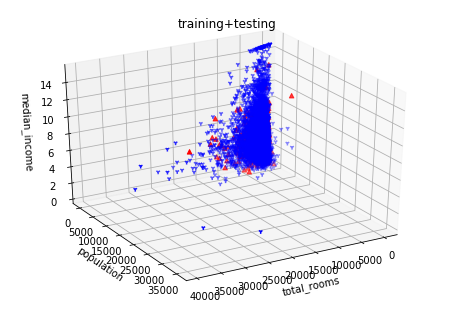

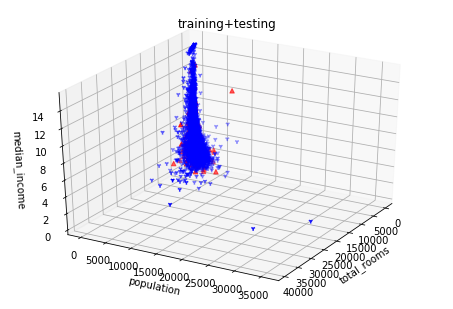

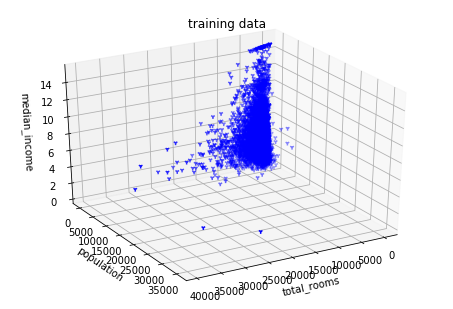

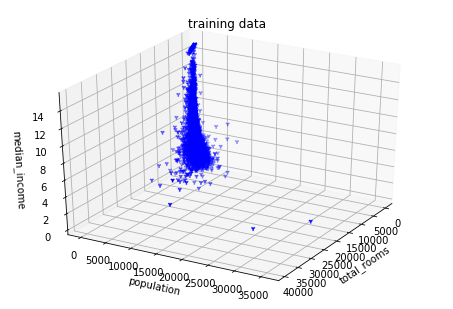

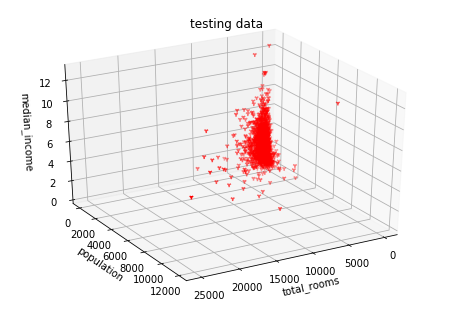

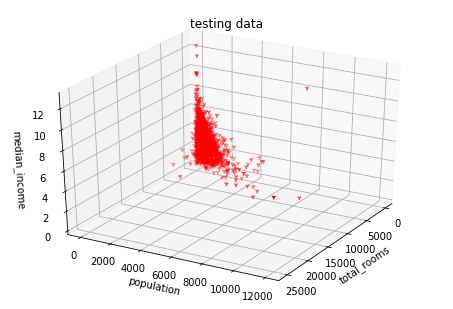

In [13]:
total_rooms = pd.DataFrame(df_train,columns = ['total_rooms'])
population = pd.DataFrame(df_train,columns = ['population'])
median_income = pd.DataFrame(df_train,columns = ['median_income'])

a = pd.DataFrame(df_test,columns = ['total_rooms'])
b = pd.DataFrame(df_test,columns = ['population'])
c = pd.DataFrame(df_test,columns = ['median_income'])

# 生成画布、3D图形对象、三维散点图
fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(a,b,c,color='r', marker='^') 
ax.scatter(total_rooms,population,median_income,color='b',marker='1') 

# 设置坐标轴显示以及旋转角度
ax.set_xlabel('total_rooms') 
ax.set_ylabel('population')
ax.set_zlabel('median_income')
ax.view_init(elev=None,azim=60)
ax.set_title('training+testing')
plt.show()

# 生成画布、3D图形对象、三维散点图
fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(a,b,c,color='r', marker='^') 
ax.scatter(total_rooms,population,median_income,color='b',marker='1') 

# 设置坐标轴显示以及旋转角度
ax.set_xlabel('total_rooms') 
ax.set_ylabel('population')
ax.set_zlabel('median_income')
ax.view_init(elev=None,azim=30)
ax.set_title('training+testing')
plt.show()


fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(total_rooms,population,median_income,color='b',marker='1') 
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('total_rooms') 
ax.set_ylabel('population')
ax.set_zlabel('median_income')
ax.view_init(elev=None,azim=60)
ax.set_title('training data')
plt.show()


fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(total_rooms,population,median_income,color='b',marker='1') 
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('total_rooms') 
ax.set_ylabel('population')
ax.set_zlabel('median_income')
ax.view_init(elev=None,azim=30)
ax.set_title('training data')
plt.show()

fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(a,b,c,color='r',marker='1') 
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('total_rooms') 
ax.set_ylabel('population')
ax.set_zlabel('median_income')
ax.view_init(elev=None,azim=60)
ax.set_title('testing data')
plt.show()


fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(a,b,c,color='r',marker='1') 
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('total_rooms') 
ax.set_ylabel('population')
ax.set_zlabel('median_income')
ax.view_init(elev=None,azim=30)
ax.set_title('testing data')
plt.show()
